# Preprocessing Data

In [141]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read Dataset

In [142]:
import pandas as pd
df = pd.read_csv('Datasets\Cars93.csv')
df.head()

,Id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             56 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [144]:
df.isnull().sum()

Id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               37
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

# Missing values treatement
df.fillna(value)

1. Categorical Feature - Text data - Mode (Most frequnetly Occuring)
2. Continuous Features - Mean or Median

In [145]:
md = df['AirBags'].mode()[0]
md

'Driver only'

In [146]:
df['AirBags'] = df['AirBags'].fillna(md)
df['AirBags'].isna().sum()

np.int64(0)

In [147]:
mn = df['Rear.seat.room'].mean()
mn

np.float64(27.82967032967033)

In [148]:
df['Rear.seat.room'] = df['Rear.seat.room'].fillna(mn)
df['Rear.seat.room'].isna().sum()


np.int64(0)

### Create 2 functions catconsep and replacer

In [149]:
def catconsep(df):
    cat = list(df.columns[df.dtypes=='object'])
    con = list(df.columns[df.dtypes!='object'])
    return cat, con

In [150]:
cat, con = catconsep(df)
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [151]:
con

['Id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [152]:
def replacer(df):
    for i in df:
        if i in cat:
            md = df[i].mode()[0]
            df[i] = df[i].fillna(md)
        else:
            mn = df[i].mean()
            df[i] = df[i].fillna(mn)
    print("Null Values filled")

### After adding PM6func file restart and run all cells

In [153]:
df.isna().sum()

Id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         0
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [154]:
from PM6func import replacer

In [155]:
replacer(df)

Null Values filled


In [156]:
df.isna().sum()

Id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [157]:
df.to_csv('Datasets\Cars93filled.csv', index=False)

### seperating X and y 

In [158]:
X = df.drop(columns=['Id','Weight'])
Y = df[['Weight']]
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,Driver only,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [159]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Feature Engineering
1. Catogorical Feature - OneHotEncoding
2. Continuous Feature - Scaling

In [160]:
cat, con = catconsep(X)
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [161]:
X_cat = X[cat]
X_con = X[con]

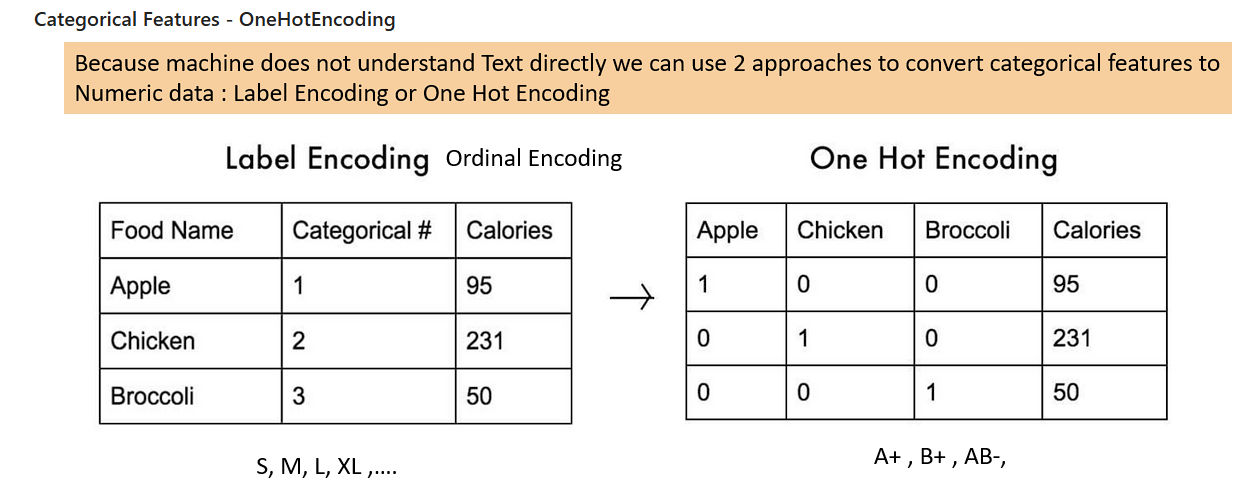

In [162]:
from sklearn.preprocessing import OneHotEncoder

In [163]:
ohe = OneHotEncoder()
X_cat_pre = ohe.fit_transform(X_cat).toarray()
X_cat_pre

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(93, 239))

In [164]:
cat_cols = ohe.get_feature_names_out()
cat_cols

array(['Manufacturer_Acura', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac',
       'Manufacturer_Chevrolet', 'Manufacturer_Chrylser',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge',
       'Manufacturer_Eagle', 'Manufacturer_Ford', 'Manufacturer_Geo',
       'Manufacturer_Honda', 'Manufacturer_Hyundai',
       'Manufacturer_Infiniti', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mazda',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Saab', 'Manufacturer_Saturn',
       'Manufacturer_Subaru', 'Manufacturer_Suzuki',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Manufacturer_Volvo', 'Model_100', 'Model_190E', 'Model_240',
       'Model_300E', 'Model_323', 'Model_535i', 'Model_626', 'Model_850',
       'Model_90', 'Model_900

In [165]:
X_cat_pre = pd.DataFrame(X_cat_pre, columns=cat_cols)
X_cat_pre.head()

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
X_con.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0
1,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0
2,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0
3,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0
4,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0


In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_con_pre = scaler.fit_transform(X_con)
X_con_pre

array([[-0.48578741, -0.37572014, -0.28246529, ..., -0.61043588,
        -0.45219708, -1.03301503],
       [ 1.38801699,  1.49784409,  1.53140881, ..., -0.29850985,
         0.73809027,  0.3966429 ],
       [ 1.00865782,  0.99822696,  0.94805231, ..., -0.61043588,
         0.05792607,  0.03922842],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ..., -0.9223619 ,
        -0.62223813,  0.3966429 ],
       [ 0.53733279,  0.33207079,  0.14593713, ..., -0.61043588,
         0.56804922,  0.03922842],
       [ 0.88220476,  0.7484184 ,  0.60168439, ..., -0.29850985,
         0.73809027,  0.3966429 ]], shape=(93, 17))

In [168]:
con_cols = scaler.get_feature_names_out()
con_cols

array(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room'], dtype=object)

In [169]:
X_con_pre = pd.DataFrame(X_con_pre, columns=[con_cols])
X_con_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186


In [170]:
X_con_pre.mean()

Min.Price             9.908442e-17
Price                -1.719055e-16
Max.Price            -3.175477e-16
MPG.city             -2.709899e-16
MPG.highway          -1.790682e-18
EngineSize           -6.350953e-16
Horsepower            2.841216e-16
RPM                  -5.419798e-16
Rev.per.mile          3.792516e-16
Fuel.tank.capacity    1.313167e-16
Passengers            1.107239e-16
Length               -9.086220e-16
Wheelbase            -9.210076e-16
Width                 3.247104e-16
Turn.circle           1.083960e-15
Rear.seat.room        3.927563e-16
Luggage.room         -1.074409e-16
dtype: float64

In [171]:
X_con_pre.std()

Min.Price             1.00542
Price                 1.00542
Max.Price             1.00542
MPG.city              1.00542
MPG.highway           1.00542
EngineSize            1.00542
Horsepower            1.00542
RPM                   1.00542
Rev.per.mile          1.00542
Fuel.tank.capacity    1.00542
Passengers            1.00542
Length                1.00542
Wheelbase             1.00542
Width                 1.00542
Turn.circle           1.00542
Rear.seat.room        1.00542
Luggage.room          1.00542
dtype: float64

### Combining X cat and con colums

In [172]:
X_pre =X_con_pre.join(X_cat_pre)
X_pre.head()

,"(Min.Price,)","(Price,)","(Max.Price,)","(MPG.city,)","(MPG.highway,)","(EngineSize,)","(Horsepower,)","(RPM,)","(Rev.per.mile,)","(Fuel.tank.capacity,)",...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Performing train test split
80% - training (Pass this into model)

20% - Testing (Unseen to the model)

In [173]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [174]:
xtrain.head()

,"(Min.Price,)","(Price,)","(Max.Price,)","(MPG.city,)","(MPG.highway,)","(EngineSize,)","(Horsepower,)","(RPM,)","(Rev.per.mile,)","(Fuel.tank.capacity,)",...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
57,1.365026,1.289670,1.185041,-0.423219,-0.016221,-0.356418,-0.265452,-0.304365,0.187910,-0.663618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,-1.003095,-0.979424,-0.911397,0.113500,0.172352,-0.841022,-0.323043,2.054464,0.157535,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.606307,0.685966,0.729294,-0.781032,-0.959087,0.322027,1.116716,1.212025,-0.247462,0.716035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.043016,-0.021825,-0.063707,-0.423219,-0.204794,0.806631,1.347077,0.875050,-0.713210,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,1.985795,1.726835,1.449374,-0.781032,-0.581941,1.872759,1.270290,-1.146804,-0.996708,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [176]:
xtest.head()

,"(Min.Price,)","(Price,)","(Max.Price,)","(MPG.city,)","(MPG.highway,)","(EngineSize,)","(Horsepower,)","(RPM,)","(Rev.per.mile,)","(Fuel.tank.capacity,)",...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
23,-1.003095,-0.854520,-0.701753,0.113500,-0.016221,-0.453339,-0.975733,-0.809828,0.532158,-0.816912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.203957,0.332071,0.428500,-0.781032,-1.336233,-0.259498,-0.111878,-0.472853,0.370159,0.961306,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.100495,-0.073868,-0.209546,-0.959938,-0.581941,2.260442,0.502419,-1.820755,-1.988953,1.942392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


### Creating Linear Regression model

In [178]:
xtrain.columns = xtrain.columns.astype(str)
xtest.columns = xtest.columns.astype(str)

In [179]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [180]:
model.score(xtrain,ytrain)

1.0

In [181]:
model.score(xtest, ytest)

0.9350275676520089

## Predicting train and test data

In [182]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [183]:
ypred_train[0:5]

array([[2920.],
       [2530.],
       [3730.],
       [3490.],
       [4055.]])

In [184]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [185]:
ypred_test[0:5]

array([[2554.53577915],
       [3606.80154122],
       [3030.92680408],
       [3332.28171607],
       [3953.02940149]])

In [186]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910
